# **1. Import Library**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN

# **2. Load Dataset**

In [23]:
df = pd.read_csv("/content/drive/MyDrive/praktikum/Praktikum 11/Data/Kota.csv")
# Deteksi kolom Latitude & Longitude
print("5 Data Teratas:")
display(df.head())

5 Data Teratas:


,Unnamed: 0,id,foreign,name,lat,long
0,0,1101,11,KABUPATEN SIMEULUE,2.46158,96.38105
1,1,1102,11,KABUPATEN ACEH SINGKIL,2.28411,97.79769
2,2,1103,11,KABUPATEN ACEH SELATAN,3.26142,97.17933
3,3,1104,11,KABUPATEN ACEH TENGGARA,3.48673,97.81081
4,4,1105,11,KABUPATEN ACEH TIMUR,4.94789,97.77651


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  514 non-null    int64  
 1   id          514 non-null    int64  
 2   foreign     514 non-null    int64  
 3   name        514 non-null    object 
 4   lat         514 non-null    float64
 5   long        514 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 24.2+ KB


In [24]:
lat_cols = [c for c in df.columns if "lat" in c.lower()]
lon_cols = [c for c in df.columns if "lon" in c.lower() or "long" in c.lower()]

if len(lat_cols) == 0 or len(lon_cols) == 0:
    raise ValueError("Dataset wajib memiliki kolom Latitude dan Longitude")

lat = lat_cols[0]
lon = lon_cols[0]

print("Kolom Latitude  :", lat)
print("Kolom Longitude :", lon)

# Data untuk clustering
X = df[[lon, lat]]

Kolom Latitude  : lat
Kolom Longitude : long


# **3. Visualisasi **

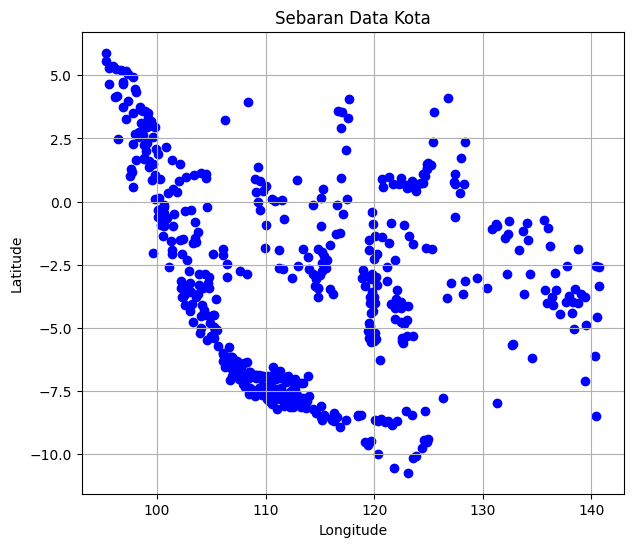

In [27]:
plt.figure(figsize=(7,6))
plt.scatter(df[lon], df[lat], c='blue')
plt.title("Sebaran Data Kota")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

# **4. K-Means**

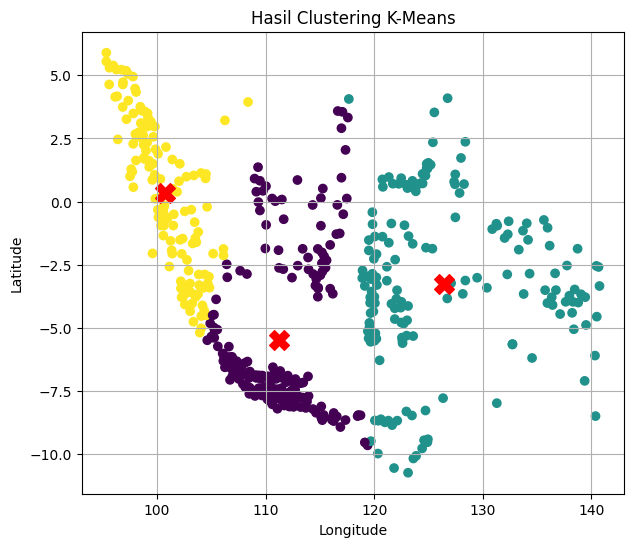

In [28]:
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster_KMeans"] = kmeans.fit_predict(X)

plt.figure(figsize=(7,6))
plt.scatter(df[lon], df[lat], c=df["Cluster_KMeans"], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],
            s=200, c='red', marker='X')
plt.title("Hasil Clustering K-Means")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


# **5. DB SCAN**

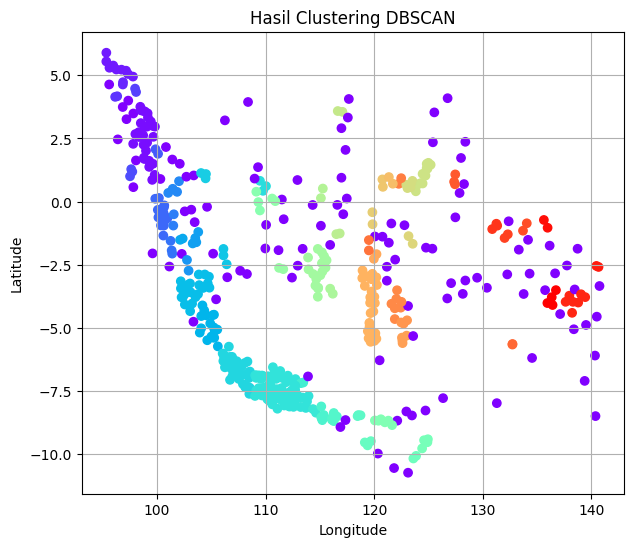

In [29]:
dbscan = DBSCAN(eps=0.5, min_samples=2)
df["Cluster_DBSCAN"] = dbscan.fit_predict(X)

plt.figure(figsize=(7,6))
plt.scatter(df[lon], df[lat], c=df["Cluster_DBSCAN"], cmap='rainbow')
plt.title("Hasil Clustering DBSCAN")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

# **6. Hasil Akhir**

In [30]:
print("DATASET SETELAH CLUSTERING:")
display(df)

DATASET SETELAH CLUSTERING:


,Unnamed: 0,id,foreign,name,lat,long,Cluster_KMeans,Cluster_DBSCAN
0,0,1101,11,KABUPATEN SIMEULUE,2.46158,96.38105,2,-1
1,1,1102,11,KABUPATEN ACEH SINGKIL,2.28411,97.79769,2,0
2,2,1103,11,KABUPATEN ACEH SELATAN,3.26142,97.17933,2,-1
3,3,1104,11,KABUPATEN ACEH TENGGARA,3.48673,97.81081,2,-1
4,4,1105,11,KABUPATEN ACEH TIMUR,4.94789,97.77651,2,1
...,...,...,...,...,...,...,...,...
509,509,9433,94,KABUPATEN PUNCAK,-3.97143,137.64241,1,56
510,510,9434,94,KABUPATEN DOGIYAI,-4.01939,135.96104,1,59
511,511,9435,94,KABUPATEN INTAN JAYA,-3.50764,136.74785,1,59
512,512,9436,94,KABUPATEN DEIYAI,-4.09749,136.43931,1,59
